In [3]:
import pandas as pd
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [4]:
worldTweet = pd.read_csv('world-march-dec-2019.csv')
#filter NaN tweets
worldTweet = worldTweet.dropna(subset=['text'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
worldTweet.shape

(418235, 11)

# 418235 Tweets | March 2019 - December 2019

## Word Cloud

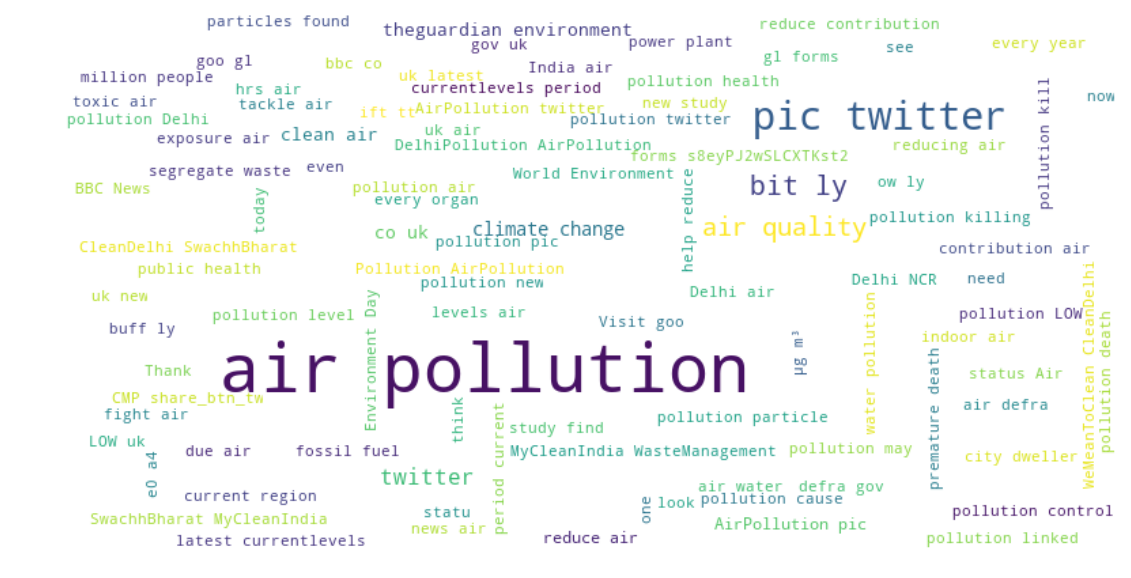

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https://","https", "bit" "ly"])
text = " ".join(t for t in worldTweet['text'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", width=800, height=400).generate(text)
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtags

In [6]:
import re
regex = r"# [a-zA-Z]*"
di = {'Hashtags':[], 'Frequency':[]}
for tweet in worldTweet['text']:
    matches = re.finditer(regex, tweet, re.MULTILINE)
    for match in matches:
        if match[0] in di['Hashtags']:
            i=di['Hashtags'].index(match[0])
            di['Frequency'][i] = di['Frequency'][i]+1
        else:
            di['Hashtags'].append(match[0])
            di['Frequency'].append(1)
#create a dataframe out of dict
x = pd.DataFrame.from_dict(di)
x.sort_values(["Frequency", "Hashtags"], axis=0, ascending=[False,False]).head(20)

,Hashtags,Frequency
2,# AirPollution,71956
8,# airpollution,36248
5,# pollution,11023
351,# DelhiPollution,8517
41,#,8392
1862,# WorldEnvironmentDay,6781
1240,# Delhi,6665
208,# Airpollution,6628
26,# AirQuality,6013
798,# BeatAirPollution,5267


## Most Mentions

In [7]:
import re
regex = r"@ [a-zA-Z1-9]*"
di = {'Mentions':[], 'Frequency':[]}
for tweet in worldTweet['text']:
    matches = re.finditer(regex, tweet, re.MULTILINE)
    for match in matches:
        if match[0] in di['Mentions']:
            i=di['Mentions'].index(match[0])
            di['Frequency'][i] = di['Frequency'][i]+1
        else:
            di['Mentions'].append(match[0])
            di['Frequency'].append(1)

x = pd.DataFrame.from_dict(di)
x.sort_values(["Frequency", "Mentions"], axis=0, ascending=[False,False]).head(20)


,Mentions,Frequency
379,@ ArvindKejriwal,3380
247,@,2778
122,@ WHO,2625
304,@ PMOIndia,2525
315,@ narendramodi,2325
312,@ CPCB,1791
6618,@ PrakashJavdekar,1480
14,@ EPA,1127
10,@ YouTube,1032
641,@ moefcc,962


## Filter DataFrame on basis of keywords

In [75]:
df_sp.shape

(21029, 10)

In [76]:
df_sp.to_csv('tweet-march-dec-2019.csv')

In [74]:
#filter out NaN tweets

aqFrame = aqFrame.dropna(subset=['text'])

#put keywords here

strn = ['delhi', 'india']
df_sp = aqFrame[aqFrame['text'].str.contains('|'.join(strn))]

## Analysis of Number of Tweets vs PM$_{2.5}$ Levels In a Location

In [65]:
#read the file and change the index to time
#df = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
df = pd.read_csv('april-Dec-2019-ap.csv')
#df.index = pd.to_datetime(df['Tweet post Date'])
df.index = pd.to_datetime(df['date'], errors='coerce')  

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
df.shape

(377801, 11)

In [67]:
#create a copy
A = df 
#create a new column of frequency of tweets
A['freq'] = 1
#create a new dataframe consisting only index and frequency
A = A.filter(['index', 'freq'])

In [94]:
# Groupy by date and see the count
#x = newdf.groupby([newdf.resample('1H')]).agg({'count'})

In [68]:
#Resample to 1 Hour and take the sum
A = A.resample('1H').sum()

In [69]:
A.head()

,freq
date,
2019-04-01 00:00:00,25
2019-04-01 01:00:00,17
2019-04-01 02:00:00,22
2019-04-01 03:00:00,31
2019-04-01 04:00:00,26


In [99]:
#Save it if you want
#A.to_csv('data.csv');

In [81]:
#read the pollution level file for a location. This is for Lodhi Road, New Delhi
pmLevels = pd.read_csv(r'D:\JNotebooks\twitterAQ\data\openaq\sample.csv')
pmLevels.index = pd.to_datetime(pmLevels['local'])
#remove tz info so that merging two df later does not become painful
pmLevels.index = pmLevels.index.tz_localize(None)
#Resample PM levels to houtly level mean
pmLevels = pmLevels.resample('1H').mean()

In [82]:
#check if the values are coming up correctly
pmLevels.head(1)

,value,latitude,longitude
local,,,
2019-10-01 05:00:00,15.52,28.591825,77.227307


In [83]:
#changing the time frame and keeping it matched between both the files
A = A['2019-10-01':'2019-12-30']

In [85]:
#let us merge both the dataframe, okay?
#Recall: inner is intersection i.e. common to both will only appear
merge=pd.merge(A,pmLevels, how='inner', left_index=True, right_index=True)

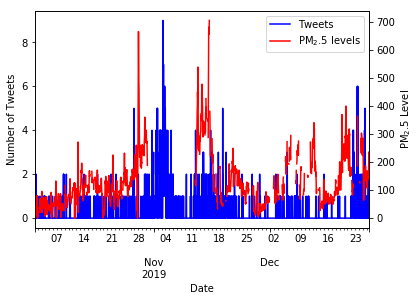

In [86]:
#Lets just plot now
fig, ax = plt.subplots()
y1 = merge.freq.plot(ax=ax, style='b-', label='Tweets')
y2 = merge.value.plot(ax=ax, style='r-', secondary_y=True, label='PM$_2.5$ levels')

y1.set_ylabel("Number of Tweets")
y2.set_ylabel("PM$_2.5$ Level")
y1.set_xlabel("Date")

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
B = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
B.index = pd.to_datetime(B['Tweet post Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


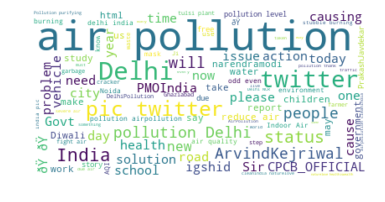

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https://","https"])
text = " ".join(t for t in B['Tweet text'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()